# **1 Author**

Student Name: Shyam Babu Valmiki


Student id: 220522892

# **2 Problem Formulation**

Using the MLEnd London Sounds dataset, we are building a machine learning pipeline that takes as an input an audio segment and predicts whether the audio segment has been recorded indoors or outdoors.

I am excited to work with this challenge as it helps to showcase the skills that I learnt during my lectures and lab. 

I used to work on a normal data set that is stored in a CSV file before. Now I am working on an audio file in the WAV format, in particular this seems to be interesting and challenging at the same time.

# **3 Machine Learning pipeline**

The project started by recording the specified locations for a duration of 7 seconds. The audio is extracted from the recorded videos. 

These audio files are in the .WAV format. We start our classification by extrating the features from the WAV files. The features extracted are Power, Pitch - mean, Pitch - standard deviation, and Fraction of voiced region.

We shall further extract the loudness of the audio files to improve the performance of the model.

Before we fit a model on the data set obtained. We divide the dataset into training dataset and validation/test dataset.

Once we have the data we normalize it to standard form using the buit in methods of sklearn.

we then fit SVM classifier on the training data set and then test our model on the validation/test dataset

Then we analyze our model by plotting relevant plots and try to visualize the dataset. to understand more about the dataset.

# **4 Transformation Stage**

We use the features extracted from the audio segments to classify whether the audio is an indoor or an outdoor sound. The features extracted are Power, Pitch - mean, Pitch - standard deviation, Fraction of voiced region, and the loudness .

The features are fed as input to our model and the output is the label indoor or outdoor which is an boolean, where indoor is indicated as 1 and outdoor as 0.

# **5 Modelling**

We chose to work model a SVM for our modelling. SVM perform better for large dataset with large features. We shall apply Naive Bayes and KNN models to see compare their performance with each other and to find a better fit for our model.

# **6 Methodology**

We train the data on the training dataset that consists of four features. We then test the model by predicting the labels for the test/validation set. We analyze the model by plotting confusion matrix and measuring the accuracy on both the training and the validation/test dataset. 

We add the loudness feature to improve the performance of the model and then analyze the model by plotting confusion matrix and measuring the training and the validation/test accuracy.

# **7 Dataset**

We have a CSV consisting of audio ID along with the spot, area, indoor/outdoor label and the participant ID as a dataset. 

The actual audio files are stored in google drive and are accessed from the drive to extract the features.   

We mount the google drive as follows.

In [1]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


The total audio files are stored in 5 zip files of equal sizes. Each zip file has 500 audio files.Let us unzip the zip files and store the audio files from all the zipfiles in one folder. 

The path of the audio files is /content/drive/MyDrive/Data/MLEndLS/sample/ and the path of the zipfiles is /content/drive/MyDrive/Data/MLEndLS/.

Let us unzip zipfiles one by one as below.


In [ ]:
#directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndLS/sample/'
#zip_path = '/content/drive/MyDrive/Data/MLEndLS/MLEndLS_1.zip'
#with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#    zip_ref.extractall(directory_to_extract_to)



In [ ]:
#directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndLS/sample/'
#zip_path = '/content/drive/MyDrive/Data/MLEndLS/MLEndLS_2.zip'
#with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#    zip_ref.extractall(directory_to_extract_to)



In [ ]:
#directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndLS/sample/'
#zip_path = '/content/drive/MyDrive/Data/MLEndLS/MLEndLS_3.zip'
#with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#    zip_ref.extractall(directory_to_extract_to)



In [ ]:
#directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndLS/sample/'
#zip_path = '/content/drive/MyDrive/Data/MLEndLS/MLEndLS_4.zip'
#with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#    zip_ref.extractall(directory_to_extract_to)



In [ ]:
#directory_to_extract_to = '/content/drive/MyDrive/Data/MLEndLS/sample/'
#zip_path = '/content/drive/MyDrive/Data/MLEndLS/MLEndLS_5.zip'
#with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#    zip_ref.extractall(directory_to_extract_to)



Let us store the audio files in the variable called files and print the total number of files.

In [2]:
sample_path = '/content/drive/MyDrive/Data/MLEndLS/sample/*.wav'
files = glob.glob(sample_path)
len(files)

2500

Now let us store the data in CSV file in the panda data frame.

In [3]:
MLENDLS_df = pd.read_csv('./MLEndLS (1).csv').set_index('file_id') 
MLENDLS_df

,area,spot,in_out,Participant
file_id,,,,
0001.wav,british,street,outdoor,S151
0002.wav,kensington,dinosaur,indoor,S127
0003.wav,campus,square,outdoor,S18
0004.wav,kensington,hintze,indoor,S179
0005.wav,campus,square,outdoor,S176
...,...,...,...,...
2496.wav,westend,trafalgar,outdoor,S151
2497.wav,campus,square,outdoor,S6
2498.wav,westend,national,indoor,S96


Let us represent a random audio file. Here the random audio is audio file at 32nd position

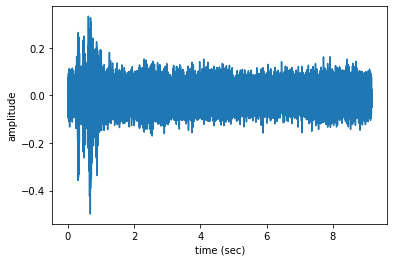

In [4]:
n=31
fs = None # Sampling frequency
x, fs = librosa.load(files[n],sr=fs)
t = np.arange(len(x))/fs
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(files[n]))

The details of the audio file are as follows.

In [5]:
MLENDLS_df.loc[files[n].split('/')[-1]]

area              british
spot           greatcourt
in_out             indoor
Participant           S27
Name: 1532.wav, dtype: object

Let us define functions to extract the features from the audio segment.

In [6]:
def getPitch(x,fs,winLen=0.02):
  #winLen = 0.02 
  p = winLen*fs
  frame_length = int(2**int(p-1).bit_length())
  hop_length = frame_length//2
  f0, voiced_flag, voiced_probs = librosa.pyin(y=x, fmin=80, fmax=450, sr=fs,
                                                 frame_length=frame_length,hop_length=hop_length)
  return f0,voiced_flag

Let us instantiate a list that stores the index of files that causes errors during feature extraction for further reference.

In [7]:
li_ind = []

In [8]:
def getXy(files,labels_file, scale_audio=False, onlySingleDigit=False):
  X,y =[],[]
  i = 1
  for file in tqdm(files):
    try:
      fileID = file.split('/')[-1]
      file_name = file.split('/')[-1]
      yi = labels_file.loc[fileID]['in_out']=='indoor'

      fs = None # if None, fs would be 22050
      x, fs = librosa.load(file,sr=fs)
      if scale_audio: x = x/np.max(np.abs(x))
      f0, voiced_flag = getPitch(x,fs,winLen=0.02)
      
      power = np.sum(x**2)/len(x)
      pitch_mean = np.nanmean(f0) if np.mean(np.isnan(f0))<1 else 0
      pitch_std  = np.nanstd(f0) if np.mean(np.isnan(f0))<1 else 0
      voiced_fr = np.mean(voiced_flag)

      xi = [power,pitch_mean,pitch_std,voiced_fr]
      if i not in [33,706, 2455, 2499, 2500]:
        X.append(xi)
        y.append(yi)
        i+=1
    except:
      li_ind.append(i)
      i+=1
      continue
    


  return np.array(X),np.array(y)

Feature extraction and assigning labels to audio files.

In [9]:
X,y = getXy(files, labels_file=MLENDLS_df, scale_audio=True, onlySingleDigit=True)

 28%|██▊       | 705/2500 [24:38<1:07:16,  2.25s/it]<ipython-input-8-7407efe58358>:12: RuntimeWarning: invalid value encountered in true_divide
  if scale_audio: x = x/np.max(np.abs(x))
100%|█████████▉| 2499/2500 [1:25:32<00:02,  2.10s/it]/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
100%|██████████| 2500/2500 [1:25:33<00:00,  2.05s/it]


Let us have a look at the shape of X, y and contents of y.

In [ ]:
print('The shape of X is', X.shape) 
print('The shape of y is', y.shape)
print('The labels vector is', y)


In [ ]:
li_ind

[33]

Let us see if the dataset is balanced.

In [ ]:
print(' The number of indoor recordings is ', np.count_nonzero(y))
print(' The number of outdoor recordings is ', y.size - np.count_nonzero(y))

 The number of indoor recordings is  210
 The number of outdoor recordings is  289


# **8 Results**

Let us split the dataset into training and test/validation dataset.

In [11]:
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((523, 4), (225, 4), (523,), (225,))

### Fitting a model on raw dataset

Fitting a SVM and printing the accuracy of the model on training and the test dataset.

In [12]:
model  = svm.SVC(C=1)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.5544933078393881
Validation  Accuracy 0.5155555555555555
The support vectors are (484, 4)


### Fitting on standardized data

let us standardardize dataset using the StandardScaler from sklearn

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

model  = svm.SVC(C=1,gamma=2)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.9541108986615678
Validation  Accuracy 0.5377777777777778
The support vectors are (510, 4)


Let us try standardizing by using the Z-score. and fit in the model.

In [14]:
mean = X_train.mean(0)
sd =  X_train.std(0)

X_train = (X_train-mean)/sd
X_val  = (X_val-mean)/sd

model  = svm.SVC(C=1,gamma=2)
model.fit(X_train,y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.7495219885277247
Validation  Accuracy 0.5422222222222223
The support vectors are (474, 4)


### Plotting confusion matrix

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


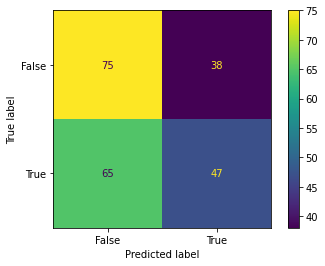

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

scaler.fit(X_train)
clf = svm.SVC(C=1,gamma=2)
clf.fit(X_train, y_train)

plot_confusion_matrix(clf, X_val, y_val)  
plt.show()

Let us try fitting other models to see how they perform on the dataset.

We shall start with Naive Bayes model first.

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

yt_p = model.predict(X_train)
yv_p = model.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))
#print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.5239005736137667
Validation  Accuracy 0.5777777777777777


Now let us fit non linear SVM and see it's performance.

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import NuSVC
clf = make_pipeline(StandardScaler(), NuSVC())
clf.fit(X_train, y_train)
#Pipeline(steps=[('standardscaler', StandardScaler()), ('nusvc', NuSVC())])

yt_p = clf.predict(X_train)
yv_p = clf.predict(X_val)

print('Training Accuracy', np.mean(yt_p==y_train))
print('Validation  Accuracy', np.mean(yv_p==y_val))

Training Accuracy 0.762906309751434
Validation  Accuracy 0.52


# **9 Conclusion**

### visual representation on dataset

Let us try to visualize the dataset using different features of the dataset. 

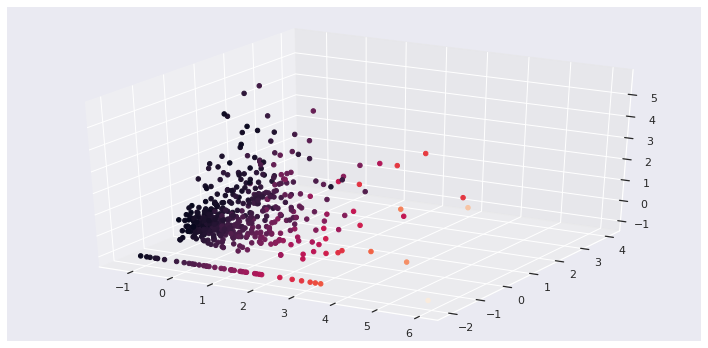

In [18]:
extractedData = X_train[:,[0,1,2]]

import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10.00, 5.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#data = np.random.random(size=(3, 3, 3))
#z, x, y = data.nonzero()
ax.scatter(extractedData[:,0], extractedData[:,1], extractedData[:,2], c=extractedData[:,0], alpha=1)
plt.show()

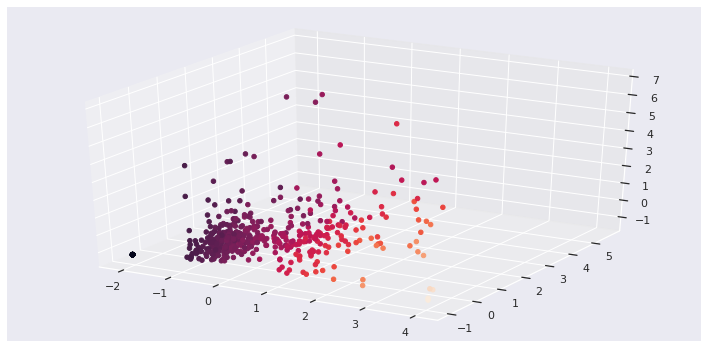

In [19]:
extractedData = X_train[:,[1,2,3]]

import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10.00, 5.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#data = np.random.random(size=(3, 3, 3))
#z, x, y = data.nonzero()
ax.scatter(extractedData[:,0], extractedData[:,1], extractedData[:,2], c=extractedData[:,0], alpha=1)
plt.show()

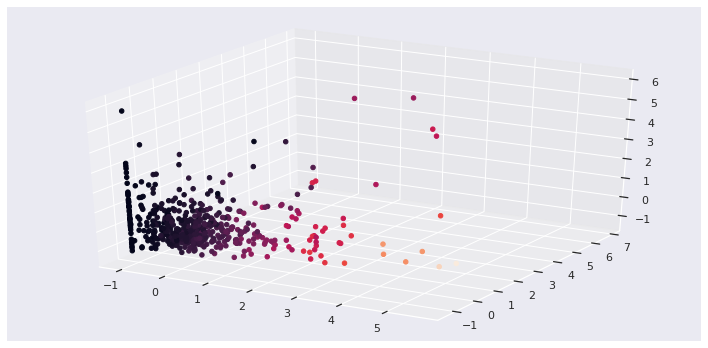

In [20]:
extractedData = X_train[:,[2,3,0]]

import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10.00, 5.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#data = np.random.random(size=(3, 3, 3))
#z, x, y = data.nonzero()
ax.scatter(extractedData[:,0], extractedData[:,1], extractedData[:,2], c=extractedData[:,0], alpha=1)
plt.show()

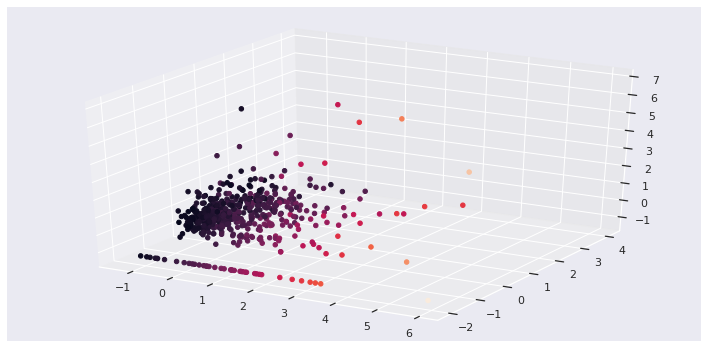

In [21]:

extractedData = X_train[:,[0,1,3]]

import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10.00, 5.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#data = np.random.random(size=(3, 3, 3))
#z, x, y = data.nonzero()
ax.scatter(extractedData[:,0], extractedData[:,1], extractedData[:,2], c=extractedData[:,0], alpha=1)
plt.show()

From the above, the features  Pitch - mean, Pitch - standard deviation, and Fraction of voiced region seem to be better for improving the performance of the model. Let us try fitting model with only these three features which are Z-score normalized.

In [22]:
X1 = X[:,[1,2,3]]
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1,y,test_size=0.3)
mean = X_train1.mean(0)
sd =  X_train1.std(0)

X_train1 = (X_train1-mean)/sd
X_val1  = (X_val1-mean)/sd

model  = svm.SVC(C=1,gamma=2)
model.fit(X_train1,y_train1)

yt_p = model.predict(X_train1)
yv_p = model.predict(X_val1)

print('Training Accuracy', np.mean(yt_p==y_train1))
print('Validation  Accuracy', np.mean(yv_p==y_val1))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.6787762906309751
Validation  Accuracy 0.5422222222222223
The support vectors are (479, 3)


Normalizing by use the StandardScaler we get the results as below.

In [23]:
X1 = X[:,[1,2,3]]
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1,y,test_size=0.3)
scaler.fit(X_train1)
model  = svm.SVC(C=1,gamma=2)
model.fit(X_train1,y_train1)

yt_p = model.predict(X_train1)
yv_p = model.predict(X_val1)

print('Training Accuracy', np.mean(yt_p==y_train1))
print('Validation  Accuracy', np.mean(yv_p==y_val1))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.9560229445506692
Validation  Accuracy 0.5422222222222223
The support vectors are (517, 3)


Seems like we have overfitted the model.

Let us try Extracting the loudness feature of the audio segments.

In [24]:

!pip install pyloudnorm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
lil_ind = []

In [26]:
#measuring the lodness of the datafile
import soundfile as sf
import pyloudnorm as pyln

li = []
i = 1
for f in files:
  if i in [33,706, 2455, 2499, 2500]:
    i+=1
    continue
  else:
    try:
      data, rate = sf.read(f)
      meter = pyln.Meter(rate)
      loudness = meter.integrated_loudness(data)
      li.append(loudness)
      i+=1
    except:
      lil_ind.append(i)
      i+=1
      continue


Let us append the extracted feature to the intitial array.

In [27]:
li = np.array(li)

In [28]:
li = li.reshape(len(li),1)

In [30]:
#arr = np.append(X, li, axis=1)

Fitting and evaluating the performance of the model.

In [ ]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(arr,y,test_size=0.3)
scaler.fit(X_train1)
model  = svm.SVC(C=1,gamma=2)
model.fit(X_train1,y_train1)

yt_p = model.predict(X_train1)
yv_p = model.predict(X_val1)

print('Training Accuracy', np.mean(yt_p==y_train1))
print('Validation  Accuracy', np.mean(yv_p==y_val1))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.9742120343839542
Validation  Accuracy 0.5333333333333333
The support vectors are (348, 5)


let us again visualize the data with the new features.

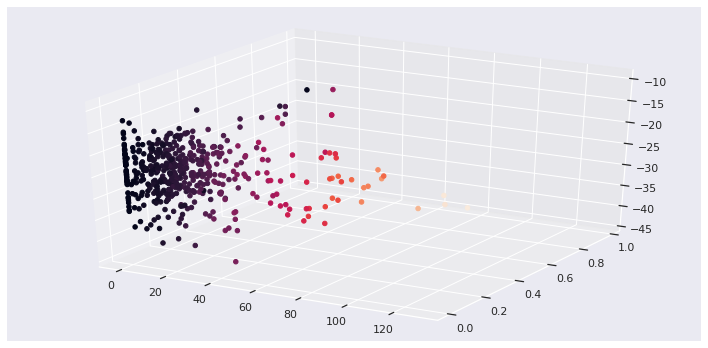

In [ ]:
extractedData = arr[:,[2,3,4]]

import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10.00, 5.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#data = np.random.random(size=(3, 3, 3))
#z, x, y = data.nonzero()
ax.scatter(extractedData[:,0], extractedData[:,1], extractedData[:,2], c=extractedData[:,0], alpha=1)
plt.show()

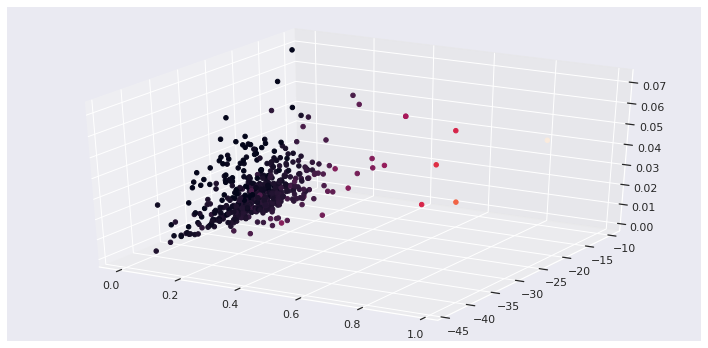

In [ ]:
extractedData = arr[:,[3,4,0]]

import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10.00, 5.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#data = np.random.random(size=(3, 3, 3))
#z, x, y = data.nonzero()
ax.scatter(extractedData[:,0], extractedData[:,1], extractedData[:,2], c=extractedData[:,0], alpha=1)
plt.show()

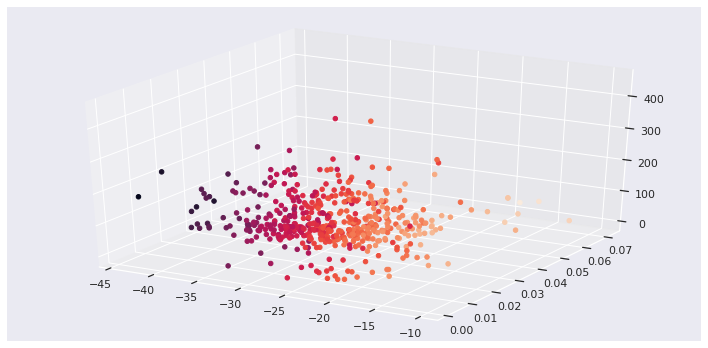

In [ ]:
extractedData = arr[:,[4,0,1]]

import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10.00, 5.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#data = np.random.random(size=(3, 3, 3))
#z, x, y = data.nonzero()
ax.scatter(extractedData[:,0], extractedData[:,1], extractedData[:,2], c=extractedData[:,0], alpha=1)
plt.show()

We chose loudness, power and pitch_mean to classify the audio segments, fit a SVM on the dataset and measure the accuracy of the model.

In [ ]:
X1 = arr[:,[4,0,1]]
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1,y,test_size=0.3)
scaler.fit(X_train1)
model  = svm.SVC(C=1,gamma=2)
model.fit(X_train1,y_train1)

yt_p = model.predict(X_train1)
yv_p = model.predict(X_val1)

print('Training Accuracy', np.mean(yt_p==y_train1))
print('Validation  Accuracy', np.mean(yv_p==y_val1))
print('The support vectors are', model.support_vectors_.shape)

Training Accuracy 0.9684813753581661
Validation  Accuracy 0.6066666666666667
The support vectors are (348, 3)


Again we seem to have done a overfitting.

In [31]:
from sklearn.pipeline import Pipeline

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3)


In [33]:
pipe = Pipeline([('scaler',StandardScaler()),('svm',svm.SVC(C=1))])


In [34]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=1))])

In [35]:
print(pipe.score(X_val,y_val))

0.52


Plotting the final pipeline for the model.

In [36]:
from sklearn import set_config

In [37]:
set_config(display = 'diagram')
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=1))])